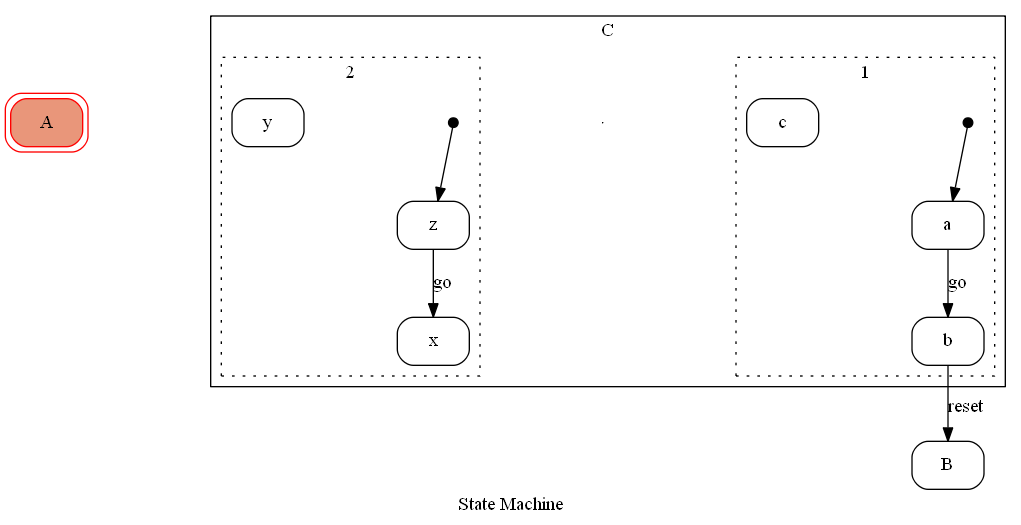

In [4]:
from transitions.extensions import HierarchicalGraphMachine as Machine
import io
from IPython.display import Image, display, display_png

class Model:
    # graph object is created by the machine
    def show_graph(self, **kwargs):
        stream = io.BytesIO()
        self.get_graph(**kwargs).draw(stream, prog='dot', format='png')
        display(Image(stream.getvalue()))

import logging
states = ['A', 'B', {'name': 'C', 'parallel': [{'name': '1', 'children': ['a', 'b', 'c'], 'initial': 'a',
                                                'transitions': [['go', 'a', 'b']]},
                                               {'name': '2', 'children': ['x', 'y', 'z'], 'initial': 'z'}],
                      'transitions': [['go', '2_z', '2_x']]}]

transitions = [['reset', 'C_1_b', 'B']]

logging.basicConfig(level=logging.INFO)

model = Model()
machine = Machine(model=model,states=states, transitions=transitions, initial='A')
model.show_graph()